For this practical work, the student will have to develop a Python program that is able to implement the accelerated gradient descent methods <b>(Momentum and NAG)</b> in order to achieve the linear regression of a set of datapoints.

#### Import numpy, matplotlib.pyplot and make it inline

In [1]:
import numpy
import matplotlib.pyplot as plt

To have a dataset or set of data points, the student must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that: 
<b>yi = a*xi + b (and a = -1, b = 2)</b>


In [2]:
import random
#Generate 20 random numbers between 0 and 20
x = random.sample(range(0,21), 21)
print(x)
print(len(x))

[4, 13, 3, 14, 17, 10, 5, 16, 9, 15, 20, 7, 12, 18, 6, 8, 2, 19, 0, 11, 1]
21


In [4]:
a=-2
b=1
y=[]
for i in range(0,21):
    y.append(a*x[i]+b)
print(y)    
print(len(y))

[-7, -25, -5, -27, -33, -19, -9, -31, -17, -29, -39, -13, -23, -35, -11, -15, -3, -37, 1, -21, -1]
21


#### Plot your data points. 

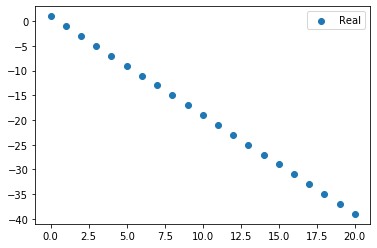

In [5]:
plt.scatter(x,y,label='Real')

plt.legend()
plt.show()  

#### Use your final version of the implemented Batch GD algorithm for single variable to find the best line filt of the given data.
#### Coose the suitable number of iterations, learning rate, and stop criteria.
#### Calculate r2 score. Shouldn't below 0.9
#### Plot the required curves (loss-epochs, loss-theta0, loss-theta1, all fitted lines per epoch (single graph) , best fit line)

In [6]:
th0=0
th1=0
alpha=0.0001
#######################################
#func to calcolate Hypothesis
def hypo(o1,o2,arr):
    h=[]
    for i in range (0,len(arr)):
        h.append(o1 + o2 *arr[i])
    return h    

#func to calculate error
def err(o1,o2,arr1,arr2):
    r=[]
    h=hypo(o1,o2,arr1)
    for i in range (0,len(arr1)):
        r.append((h[i]-arr2[i])**2)
    return r

#func to calculate h(x)-y(x)
def hminy(o1,o2,arr1,arr2):
    h=hypo(o1,o2,arr1)
    r=[]
    for i in range (0,len(arr1)):
        r.append(h[i]-arr2[i])
    return r

#func to calculate (h(x)-y(x))*x
def hminymulx(o1,o2,arr1,arr2):
    h=hypo(o1,o2,arr1)
    r=[]
    for i in range (0,len(arr1)):
        r.append((h[i]-arr2[i])*arr1[i])
    return r
    
####################################################


x    y   h(x)      error
4   -7   0       49
13   -25   0       625
3   -5   0       25
14   -27   0       729
17   -33   0       1089
10   -19   0       361
5   -9   0       81
16   -31   0       961
9   -17   0       289
15   -29   0       841
20   -39   0       1521
7   -13   0       169
12   -23   0       529
18   -35   0       1225
6   -11   0       121
8   -15   0       225
2   -3   0       9
19   -37   0       1369
0   1   0       1
11   -21   0       441
1   -1   0       1


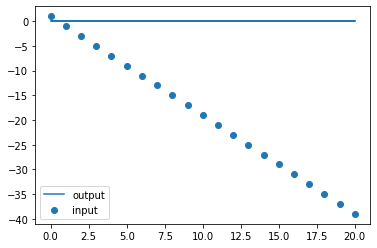

In [7]:
print('x','  ','y',' ','h(x)','    ','error')
y1=hypo(th0,th1,x)
er=err(th0,th1,x,y)
hmy=hminy(th0,th1,x,y)
hmyxx=hminymulx(th0,th1,x,y)

for i in range (0,len(x)):
    print(x[i],' ',y[i],' ',y1[i],'     ',er[i])
   
    
    
plt.scatter(x,y,label='input')
plt.plot(x,y1,label='output')
plt.legend()
plt.show()    

In [8]:
#here cost function
def cost(arr):
    sm=0
    sm = numpy.sum(arr)
    #print('cost funtion equal ',(1/(2*len(arr)))*sm) 
    return (1/(2*len(arr)))*sm
cost(er)   

253.83333333333331

In [9]:
#here calculate the optimum value  for theta0 and theta1
#sm0= numpy.sum(hminy)
#sm1=numpy.sum(hminymulx)
#mag0=(alpha*(1/len(hminy))*sm0)
#mag1=(alpha*(1/len(hminy))*sm1)
arrth0=[]
arrth1=[]

tloss=[]
reg=[]
for i in range (0,300):
    
    y1new=hypo(th0,th1,x)
    reg.append(y1new)
    ernew=err(th0,th1,x,y)
    tloss.append(cost(ernew))
    print(cost(ernew))
    fth0=hminy(th0,th1,x,y)    
    sm0= numpy.sum(fth0)   
    mag0=(alpha*(1/len(fth0))*sm0) 
    th0=th0-mag0
    arrth0.append(th0)
    fth1=hminymulx(th0,th1,x,y)    
    sm1= numpy.sum(fth1)   
    mag1=(alpha*(1/len(fth1))*sm1)            
    th1=th1-mag1
    arrth1.append(th1)
    y1new=hypo(th0,th1,x)
    reg.append(y1new)
    
    print(th0,'  ',th1)




253.83333333333331
-0.0018999999999999998    -0.02633143333333333
246.9111698571837
-0.003773478566666666    -0.05230113026587778
240.17790652424748
-0.005620800088544121    -0.07791406068548891
233.62838839968208
-0.007442323947849778    -0.10317512619883938
227.2576012227013
-0.009238404589256153    -0.12808916106953266
221.06066756769377
-0.011009391587727695    -0.152660933143328
215.0328431100993
-0.012755629715425595    -0.17689514476065374
209.16951299418906
-0.014477459007693398    -0.20079643365658378
203.46618829996345
-0.016175214828136046    -0.224369373848449
197.91850260646797
-0.017849227932804784    -0.24761847651125404
192.5222086488915
-0.01949982453350025    -0.27054819084106674
187.27317506689081
-0.021127326360205832    -0.2931629049065453
182.16738324165038
-0.022732050722663266    -0.3154669464887665
177.20092421925628
-0.024314310571102234    -0.3374645839095156
172.36999571802863
-0.025874414556135608    -0.3591600268481961
167.67089921752185
-0.027412667087831

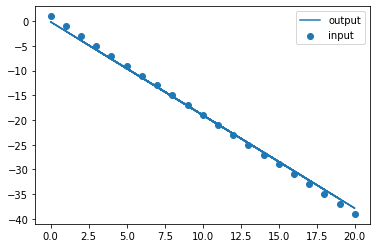

In [10]:
plt.scatter(x,y,label='input')
plt.plot(x,y1new,label='output')
plt.legend()
plt.show()

In [11]:
from sklearn.metrics import r2_score

s = r2_score(y,y1new)

print(s)

0.9967993088683615


# loss-epochs

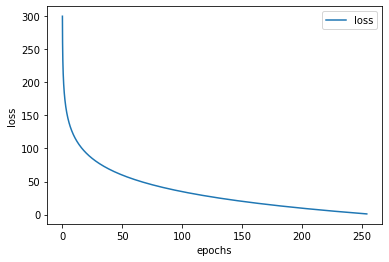

In [12]:
import numpy as np
n_list = np.arange(1, 301).tolist()

plt.plot(tloss,n_list,label='loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

# loss-theta0

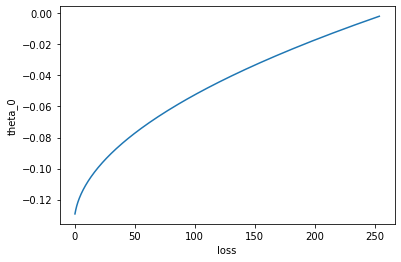

In [13]:
plt.plot(tloss,arrth0)
plt.ylabel('theta_0')
plt.xlabel('loss')
#plt.legend()
plt.show()

# loss-theta1

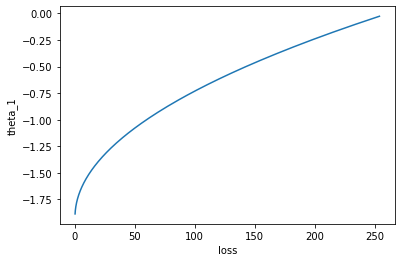

In [14]:
plt.plot(tloss,arrth1)
plt.ylabel('theta_1')
plt.xlabel('loss')
#plt.legend()
plt.show()    

# all fitted lines per epoch (single graph) 

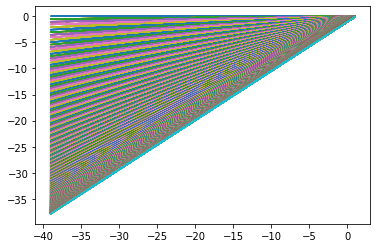

In [15]:

   
for i in range (0,len(reg)):
    plt.plot(y,reg[i])
    
    
plt.show()
    

# best fit line)

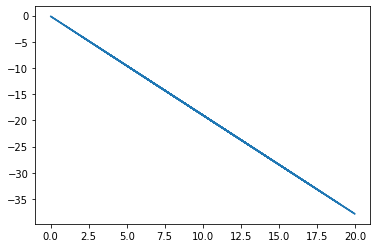

In [16]:
plt.plot(x,y1new,label='output')

plt.show()

### Update your Batch GD for one variable  implementation to be Momentum-Based GD and check your results

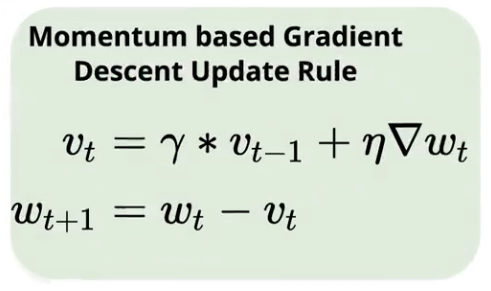

#### γ takes values between 0 and 1.
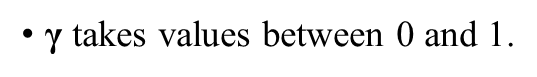

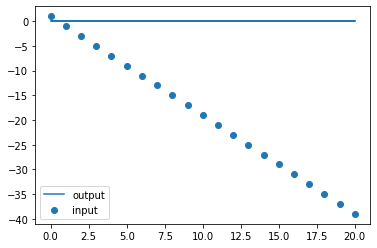

In [17]:
plt.scatter(x,y,label='input')
plt.plot(x,y1,label='output')
plt.legend()
plt.show() 


In [18]:
erm=err(0,0,x,y)
cost(erm)

253.83333333333331

In [43]:
def momen_GD(thm0,thm1,inp,out,lrm,gama):
    #here calculate the optimum value  for theta0 and theta1 
    #sm0= numpy.sum(hminy)
    #sm1=numpy.sum(hminymulx)
    #mag0=(alpha*(1/len(hminy))*sm0)
    #mag1=(alpha*(1/len(hminy))*sm1)
    arrth0=[]
    arrth1=[]
    vt0=0
    vt1=0
    tloss=[]
    reg=[]
    
    for i in range (0,500):
        
        y1new=hypo(thm0,thm1,inp)
        reg.append(y1new)
        ernew=err(thm0,thm1,inp,out)
        tloss.append(cost(ernew))
        print(cost(ernew))
        ft0=hminy(thm0,thm1,inp,out)    
        sm0= numpy.sum(ft0)   
        grad0=(lrm*(1/len(ft0))*sm0)
        vt0=gama*vt0+grad0
        thm0=thm0-vt0
        arrth0.append(thm0)
        ft1=hminymulx(thm0,thm1,inp,out)    
        sm1= numpy.sum(ft1)   
        grad1=(lrm*(1/len(ft1))*sm1) 
        vt1=gama*vt1+grad1
        thm1=thm1-vt1
        arrth1.append(thm1)
        y1new=hypo(thm0,thm1,inp)
        reg.append(y1new)
    
        
        print(thm0,'  ',thm1)
        
        #ernew=err(thm0,thm1,inp,out)
        #tloss.append(cost(ernew))

    return thm0 , thm1 , y1new , reg , arrth0 , arrth1

In [44]:
thm0 , thm1 , y1mnew , regm , arrayth0 , arrtayh1 = momen_GD(0,0,x,y,0.001,0.5)

253.83333333333331
-0.019    -0.2631433333333334
188.959801570537
-0.044849566666666674    -0.6216369154444445
115.96949543821927
-0.07051313127888889    -0.9785548634098038
60.933889615469866
-0.09248885181962307    -1.2856864508749473
27.659632896128116
-0.10952735872942107    -1.525779822733982
10.72104926846084
-0.12167928659825082    -1.6994198066905395
3.431347371369344
-0.12963937317916205    -1.8160226980226528
0.8726851047985061
-0.13432955011621198    -1.888124412791118
0.22958396496807262
-0.13665906490670954    -1.9280983431114975
0.18199317873566354
-0.13740617980593664    -1.9465378062483898
0.2340748676566008
-0.13717695301326036    -1.9516922680994235
0.25670650989629923
-0.1364082399829147    -1.94950747331819
0.24612611896161396
-0.13539240049457707    -1.9439617972358083
0.22289026754315655
-0.13430947037755558    -1.9375044188686148
0.20132503211820021
-0.13325865165998113    -1.9314842059230408
0.18646138091350128
-0.13228514159030352    -1.9265150732248686
0.17797

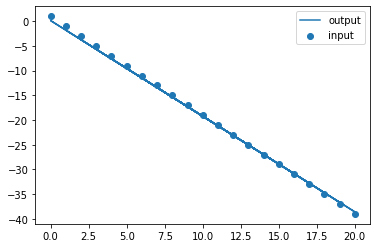

In [45]:
plt.scatter(x,y,label='input')
plt.plot(x,y1mnew,label='output')
plt.legend()
plt.show()

In [46]:
from sklearn.metrics import r2_score

sm = r2_score(y,y1mnew)

print(sm)

0.9986043514893683


#### Try another values of momentum term and check your reults.
#### Try very large values close to one and very small values close to zero. 
#### Try momentum = 0

### Update your Batch GD for one variable  implementation to be NAG and check your results

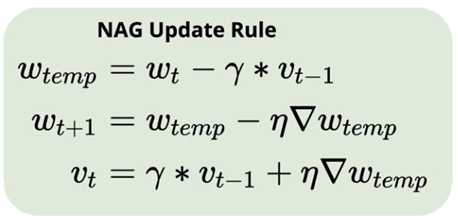

In [39]:
def momen_GD_nag(thm0,thm1,inp,out,lrm,gama):
    #here calculate the optimum value  for theta0 and theta1 
    #sm0= numpy.sum(hminy)
    #sm1=numpy.sum(hminymulx)
    #mag0=(alpha*(1/len(hminy))*sm0)
    #mag1=(alpha*(1/len(hminy))*sm1)
    arrth0=[]
    arrth1=[]
    vt0=0
    vt1=0
    tloss=[]
    reg=[]
    
    for i in range (0,500):
        
        y1new=hypo(thm0,thm1,inp)
        reg.append(y1new)
        ernew=err(thm0,thm1,inp,out)
        tloss.append(cost(ernew))
        print(cost(ernew))
        ft0=hminy(thm0,thm1,inp,out)    
        sm0= numpy.sum(ft0)   
        grad0=(lrm*(1/len(fth0))*sm0)
        vt0=gama*vt0+grad0
        thtemp0=thm0-(gama*vt0)
        thm0=thtemp0-grad0
        arrth0.append(thm0)
        ft1=hminymulx(thm0,thm1,inp,out)    
        sm1= numpy.sum(ft1)   
        grad1=(lrm*(1/len(ft1))*sm1) 
        vt1=gama*vt1+grad1
        thtemp1=thm1-(gama*vt1)
        thm1=thtemp1-grad1
        arrth1.append(thm1)
        y1new=hypo(thm0,thm1,inp)
        reg.append(y1new)
    
        
        print(thm0,'  ',thm1)
        
        #ernew=err(thm0,thm1,inp,out)
        #tloss.append(cost(ernew))

    return thm0 , thm1 , y1new , reg , arrth0 , arrth1



In [40]:
thm0t , thm1t , y1mnewt , regmt , arrayth0t , arrtayh1t = momen_GD_nag(0,0,x,y,0.001,0.5)

253.83333333333331
-0.028499999999999998    -0.3945725
160.13924390084372
-0.0557886625    -0.7736103908958333
90.38474640904109
-0.0787322673928125    -1.093932953011712
46.906556117549925
-0.09657292342868302    -1.3449797562323327
22.736981968005036
-0.10968272661674523    -1.5317053499887074
10.404604783358725
-0.1188707091138966    -1.6650741864581278
4.543861212948557
-0.12502364961518145    -1.7571372608528253
1.93103370910248
-0.1289403317654563    -1.8187600755882443
0.8357697294510391
-0.1312720593381936    -1.8588056677207279
0.40487856930738825
-0.132517200563568    -1.8840571760243212
0.2468123065919086
-0.13303980210331776    -1.8994699186899833
0.19344074087274699
-0.1330960388700913    -1.9085309554804948
0.1772379136049787
-0.1328604183574671    -1.913615646365053
0.17299307820632467
-0.1324482855749805    -1.9162939774018262
0.17208318689390678
-0.13193364553535133    -1.9175731834659615
0.171888992057294
-0.13136252132504092    -1.9180796027510998
0.17175559037170088

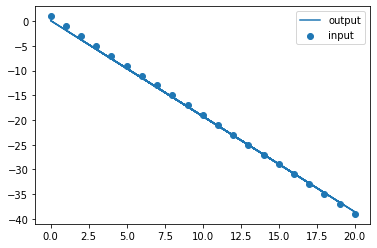

In [41]:
plt.scatter(x,y,label='input')
plt.plot(x,y1mnewt,label='output')
plt.legend()
plt.show()

In [42]:
from sklearn.metrics import r2_score

smt = r2_score(y,y1mnewt)

print(smt)

0.9986049003513295


## Congratulations 
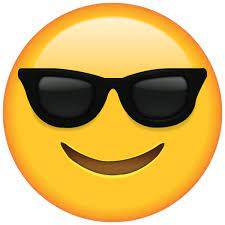